In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

1. Загрузите данные по вариантам в ноутбук.

In [6]:
df = pd.read_excel('Вариант 2.xlsx', skiprows=2, skipfooter=1)
print(df)

         №  № школы Класс Пол  Номер варианта Задания с кратким ответом  \
0        1      124    11   Ж             341              ------+-----   
1        2      128    11   Ж             345              -+----------   
2        3      132    11   Ж             340              -+----------   
3        4      134    11   Ж             339              -+----------   
4        5      136    11   Ж             348              --------+---   
...    ...      ...   ...  ..             ...                       ...   
2351  2352      136    11   М             337              ++++++++++++   
2352  2353      136    11   М             341              ++-+++++++++   
2353  2354      136    11   М             341              ++++++++++++   
2354  2355      136    11   М             343              ++++++++++++   
2355  2356      136    11   Ж             337              ++++++++++++   

     Задания с развёрнутым ответом  Устная часть  Первичный балл  Балл  \
0     0(2)0(2)0(2)0(3)0(3

2. Сделайте описательную статистику полученных данных.

In [7]:
df.describe()

,№,№ школы,Номер варианта,Устная часть,Первичный балл,Балл,Минимальный балл
count,2356.000000,2356.000000,2356.000000,0.0,2356.000000,2356.000000,2356.0
mean,1178.500000,132.005518,338.273769,NaN,10.123939,49.255093,27.0
std,680.262939,5.037984,53.660878,NaN,3.820484,17.880420,0.0
min,1.000000,121.000000,101.000000,NaN,1.000000,5.000000,27.0
25%,589.750000,127.000000,339.000000,NaN,7.000000,33.000000,27.0
50%,1178.500000,135.000000,342.500000,NaN,10.000000,50.000000,27.0
75%,1767.250000,136.000000,346.000000,NaN,13.000000,68.000000,27.0
max,2356.000000,137.000000,506.000000,NaN,27.000000,96.000000,27.0


3. Найдите процент учащихся, выполнивших работу ниже среднего.

In [8]:
mean = df['Балл'].mean()
df_underav = df[df['Балл'] < mean]
percentage_underav = df_underav.shape[0] / df.shape[0] * 100
print(percentage_underav)

48.00509337860781


4. Найти процент учащихся не сдавших экзамен.

In [9]:
df_failure = df[df['Балл'] < df['Минимальный балл']]
percentage_failure = df_failure.shape[0] / df.shape[0] * 100
print(percentage_failure)

9.210526315789473


5. Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен.

Text(0.5, 1.0, 'Распределение сдавших и не сдавших экзамен')

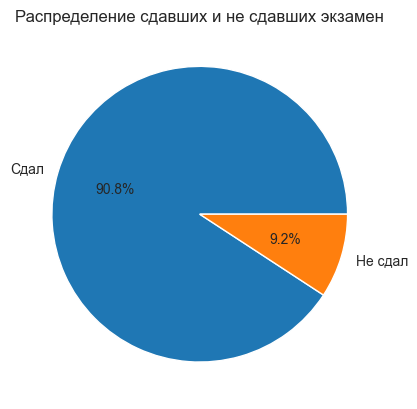

In [10]:
df_success = [100 - percentage_failure, percentage_failure]

plt.pie(df_success, labels=['Сдал', 'Не сдал'], autopct='%1.1f%%')
plt.title('Распределение сдавших и не сдавших экзамен')

6. Постройте ядерную оценку плотности распределению баллов за экзамен.

<Axes: xlabel='Балл', ylabel='Density'>

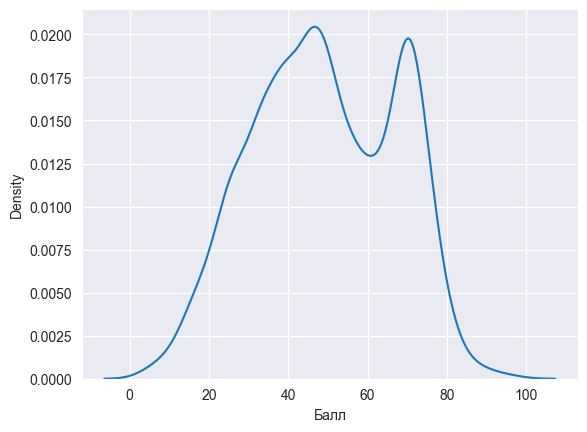

In [11]:
seaborn.kdeplot(df['Балл'])

7. Найдите процентное соотношение учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно».

In [12]:
def replace_func(x):
  if x < 63:
    return 2
  elif x > 62 and x < 77:
    return 3
  elif x > 76 and x < 91:
    return 4
  else:
    return 5

def output_score():
  df[f'Балл'] = df.loc[:, 'Балл']
  df[f'Балл'] = df[f'Балл'].apply(replace_func)
  result = df.groupby([f'Балл']).agg({f'Балл': 'count'}) / df.shape[0] * 100
  return result

print(output_score())

           Балл
Балл           
2     74.405772
3     22.028862
4      3.353141
5      0.212224


8. Какое процентное соотношение юношей и девушек писало данный экзамен?

In [13]:
df.groupby(['Пол']).agg({'Пол': 'count'}) / df.shape[0] * 100

,Пол
Пол,
Ж,52.843803
М,47.156197


9. Сколько школ принимало участие в экзамене?

In [14]:
len(df.groupby(['№ школы']).agg({'№ школы': 'count'})['№ школы'])

17

10. Сколько всего заданий с кратким ответом? С развернутым ответом?

In [15]:
shortAns = df.loc[0, 'Задания с кратким ответом']
longAns = df.loc[0, 'Задания с развёрнутым ответом']

print('Задания с кратким ответом:', len(shortAns))
print('Задания с развёрнутым ответом:', int(len(longAns)/4))

Задания с кратким ответом: 12
Задания с развёрнутым ответом: 7


11. Пусть задания с кратким ответом будут задания типа В. Соответственно всего по экзамену вопросов класса В: В, ..., Вк. Посчитайте процент выполненных и невыполненных заданий по каждому вопросу класса В.

In [16]:
for i in range(len(shortAns)):
  df.insert(len(df.columns), f'B{i+1}', 0)

for i, _ in df.iterrows():
  shortAns = df.loc[i, 'Задания с кратким ответом']
  for j in range(len(shortAns)):
    df.loc[i, f'B{j+1}'] = shortAns[j]

cols = df.loc[:, 'B1':'B12'].columns
for col in cols:
  print(col, df.groupby([col]).agg({col: 'count'}) / df.shape[0] * 100)

C:\Users\Alexander\AppData\Local\Temp\ipykernel_12376\4163962286.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i, f'B{j+1}'] = shortAns[j]
C:\Users\Alexander\AppData\Local\Temp\ipykernel_12376\4163962286.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '+' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i, f'B{j+1}'] = shortAns[j]


B1           B1
B1          
+   89.26146
-   10.73854
B2           B2
B2          
+   95.33107
-    4.66893
B3           B3
B3          
+   92.78438
-    7.21562
B4            B4
B4           
+   91.001698
-    8.998302
B5            B5
B5           
+   88.497453
-   11.502547
B6            B6
B6           
+   73.174873
-   26.825127
B7            B7
B7           
+   37.478778
-   62.521222
B8            B8
B8           
+   47.835314
-   52.164686
B9            B9
B9           
+   91.850594
-    8.149406
B10           B10
B10          
+    71.47708
-    28.52292
B11            B11
B11           
+    59.252971
-    40.747029
B12            B12
B12           
+    46.222411
-    53.777589


12. Аналогично и с типом С (ответы с развернутым ответом)

In [17]:
for i in range(int(len(longAns)/4)):
  df.insert(len(df.columns), f'C{i+1}', 0)
for i, _ in df.iterrows():
  longAns = df.loc[i, 'Задания с развёрнутым ответом']
  for j, counter in zip(range(0, int(len(longAns)/4), 4), range(int(len(longAns)/4))):
    # print(j)
    df.loc[i, f'C{counter+1}'] = longAns[j]
    # print(longAns[j])
cols = df.loc[:, 'C1':'C7'].columns
for col in cols:
  print(col, df.groupby([col]).agg({col: 'count'}) / df.shape[0] * 100)

C:\Users\Alexander\AppData\Local\Temp\ipykernel_12376\1291139516.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i, f'C{counter+1}'] = longAns[j]


C1            C1
C1           
0   66.086587
1    7.767402
2   26.146010
C2            C2
C2           
0   84.125637
1    8.404075
2    7.470289
C3        C3
C3       
0   100.0
C4        C4
C4       
0   100.0
C5        C5
C5       
0   100.0
C6        C6
C6       
0   100.0
C7        C7
C7       
0   100.0


13. Сделайте анализ по двум школам:
I. по всем выполненным заданиям типа В
II. по заданиям типа С больше 50%
III. по среднему баллу юношей и девушек

In [20]:
# Разделение данных по школам
school1_data = df[df['№ школы'] == 124]
school2_data = df[df['№ школы'] == 128]

# I. Анализ выполненных заданий типа В для обеих школ
school1_total_V = school1_data['Балл'].sum()
school2_total_V = school2_data['Балл'].sum()
print("Школа 1: Всего баллов по заданиям типа В:", school1_total_V)
print("Школа 2: Всего баллов по заданиям типа В:", school2_total_V)

# II. Анализ выполненных заданий типа С, где более 50% заданий с развёрнутым ответом, для обеих школ
school1_C_data = school1_data[school1_data['Балл'] > school1_data['Минимальный балл'] / 2]
school2_C_data = school2_data[school2_data['Балл'] > school2_data['Минимальный балл'] / 2]
print("Школа 1: Задания типа С (больше 50%):", school1_C_data.shape[0], "из", school1_data.shape[0])
print("Школа 2: Задания типа С (больше 50%):", school2_C_data.shape[0], "из", school2_data.shape[0])

# III. Анализ средних баллов между юношами и девушками в обеих школах
school1_mean_scores = school1_data.groupby('Пол')['Балл'].mean()
school2_mean_scores = school2_data.groupby('Пол')['Балл'].mean()
print("Средние баллы по полу в школе 1:")
print(school1_mean_scores)
print("Средние баллы по полу в школе 2:")
print(school2_mean_scores)

Школа 1: Всего баллов по заданиям типа В: 74
Школа 2: Всего баллов по заданиям типа В: 240
Школа 1: Задания типа С (больше 50%): 0 из 35
Школа 2: Задания типа С (больше 50%): 0 из 113
Средние баллы по полу в школе 1:
Пол
Ж    2.043478
М    2.250000
Name: Балл, dtype: float64
Средние баллы по полу в школе 2:
Пол
Ж    2.132353
М    2.111111
Name: Балл, dtype: float64


14. Для каждого задания добавьте соответствующий раздел в ноутбук и текстовые пояснения.